In [9]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from math import ceil
MODELNUM = 7

In [10]:
file_dir = "/opt/ml/input/code/submit/"
files = os.listdir(file_dir)

In [11]:
def getfile(file_name):
    data = pd.DataFrame(pd.read_csv(file_dir+file_name))
    data = list(map(lambda x: int(float(x)+0.5),data["rating"]))
    return data

In [12]:
def process(text):
    temp = "".join(list(filter(lambda x: not (x.islower() or x.isdigit() or x=="."), text.replace("-","")))).strip("_")
    return temp

In [13]:
def divide(file_list):
    file_dict = {i:[] for i in range(1, MODELNUM+1)}
    for f in file_list:
        tok = process(f)
        file_dict[len(tok.split("__"))].append(f)
    return file_dict
files_dict = divide(files)

In [14]:
def plot_group(file_list, m = 2):
    size = len(file_list)
    n = ceil(size/m)
    plt.figure(figsize=(12,6))
    for idx, f in enumerate(file_list):
        plt.subplot(n, m, 1+idx)
        plt.title(process(f))
        plt.xlabel("rating")
        plt.ylabel("count")
        plt.xlim(-0.5,20)
        data = getfile(f)
        data = Counter(data)
        plt.bar(data.keys(), data.values())

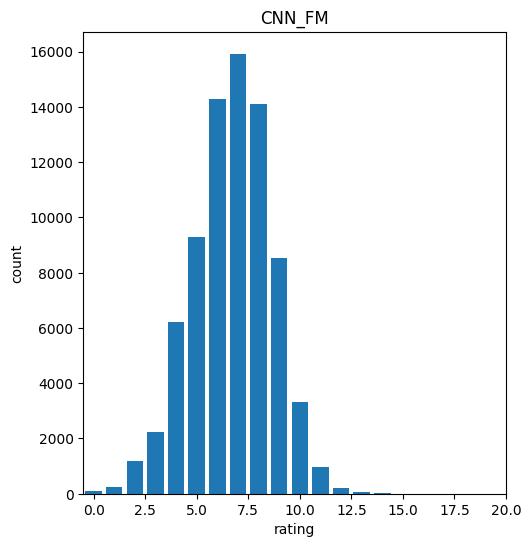

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [15]:
for i in range(1, 8):
    plot_group(files_dict[i])